<a href="https://colab.research.google.com/github/sademmhamdi/GoMyCode/blob/main/Covid_Website_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
  <!-- Favicon -->
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x
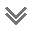

In [1]:
import requests
from bs4 import BeautifulSoup
link = "https://www.worldometers.info/coronavirus/"
page = requests.get(link)
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

In [5]:
import requests
from bs4 import BeautifulSoup

def get_covid_stats(country):
    url = f"https://www.worldometers.info/coronavirus/country/{country}/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        total_cases = soup.find("div", class_="maincounter-number").span.text
        total_deaths = soup.find_all("div", class_="maincounter-number")[1].span.text
        total_recovered = soup.find_all("div", class_="maincounter-number")[2].span.text

        return {
            "Country": country,
            "Total Cases": total_cases,
            "Total Deaths": total_deaths,
            "Total Recovered": total_recovered
        }
    else:
        return None

if __name__ == "__main__":
    country_name = input("Enter the name of the country: ")
    country_data = get_covid_stats(country_name.lower())

    if country_data:
        print("COVID-19 Statistics for", country_data["Country"])
        print("Total Cases:", country_data["Total Cases"])
        print("Total Deaths:", country_data["Total Deaths"])
        print("Total Recovered:", country_data["Total Recovered"])
    else:
        print("Country not found or error occurred while fetching data.")

Enter the name of the country: france
COVID-19 Statistics for france
Total Cases: 40,138,560        
Total Deaths: 167,642
Total Recovered: 15,867,601
